In [1]:
import logging
import numpy as np
import pandas as pd

from src.datasets import load_wine_dataset
from src.shadow_learn import ShadowedSetEstimator
from src.model_selection import grid_search, score_zoom
from src.utils import create_logfile, log_last_execution, plot_shadowed_set

In [2]:
log = True
create_logfile('grid_search_two_phases_single_C_wine', 
              'Started Grid Search for Gurobi Two Phases Single C Models on wine dataset', log)

In [3]:
labels = ['class_0', 'class_1', 'class_2']
label_colors = ['crimson', 'mediumseagreen', 'cornflowerblue']

contourf_colors = ['white', 'pink', 'palevioletred', 'red']

In [4]:
estimator = ShadowedSetEstimator(solver='gurobi-two-phases-single-C')

## Class_0 conservative metric GridSearch

In [5]:
dataset_loader = lambda: load_wine_dataset(d=2, target='class_0')

In [6]:
C_range = np.concatenate((np.logspace(-1, 0, 5), [0.511111]))
sigma_range = np.concatenate((np.logspace(-1, 1, 5), [2.37778]))
param_grid = {'C': C_range, 'sigma': sigma_range}

In [7]:
gs_res = grid_search(dataset_loader, estimator, 'conservative', param_grid, scaled=True, log=log)

***** Split n. 0
Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  56 tasks      | elapsed:    5.3s


Using license file C:\Users\gabri\gurobi.lic
Academic license - for non-commercial use only
mean_fit_time                                          0.0878447
std_fit_time                                          0.00676879
mean_score_time                                       0.00507529
std_score_time                                       0.000730723
param_C                                                 0.562341
param_sigma                                              2.37778
params               {'C': 0.5623413251903491, 'sigma': 2.37778}
split0_test_score                                       0.923077
split1_test_score                                       0.923077
split2_test_score                                       0.923077
split3_test_score                                       0.923077
split4_test_score                                       0.833333
split5_test_score                                       0.833333
split6_test_score                                              

[Parallel(n_jobs=2)]: Done 360 out of 360 | elapsed:   20.6s finished


100%|##########| 22500/22500 [00:09<00:00, 2413.39it/s]


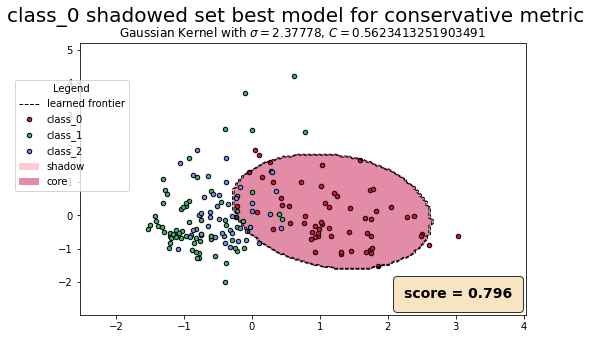

In [8]:
plot_shadowed_set(gs_res, labels, label_colors, contourf_colors, simplified=True)

## Class_0 conservative metric score charts

In [9]:
C_range = np.linspace(0.2, 3, 10)
sigma_range = np.linspace(0.2, 10, 10)
param_grid = {'C': C_range, 'sigma': sigma_range}

Fitting 10 folds for each of 121 candidates, totalling 1210 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    4.2s
[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:   18.8s
[Parallel(n_jobs=2)]: Done 888 tasks      | elapsed:   42.8s
[Parallel(n_jobs=2)]: Done 1210 out of 1210 | elapsed:   58.5s finished


mean_fit_time                                                0.0825696
std_fit_time                                               0.000995515
mean_score_time                                             0.00478215
std_score_time                                             0.000292526
param_C                                                       0.511111
param_sigma                                                    2.37778
params               {'C': 0.5111111111111111, 'sigma': 2.377777777...
split0_test_score                                             0.923077
split1_test_score                                             0.923077
split2_test_score                                             0.923077
split3_test_score                                             0.923077
split4_test_score                                             0.833333
split5_test_score                                             0.833333
split6_test_score                                                    1
split7

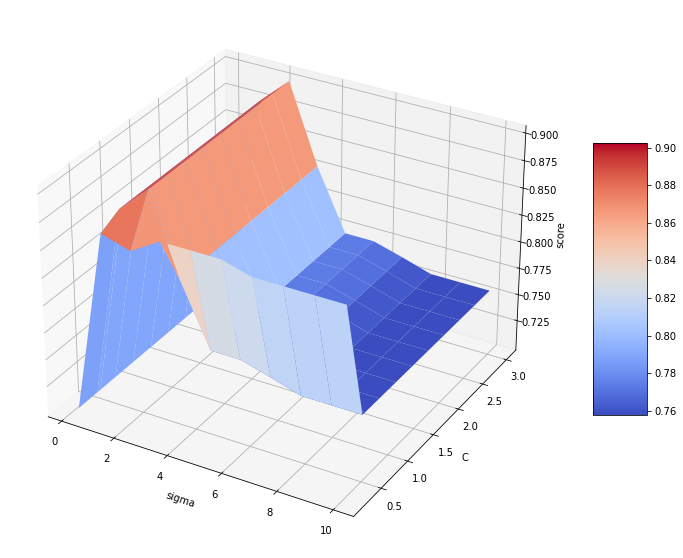

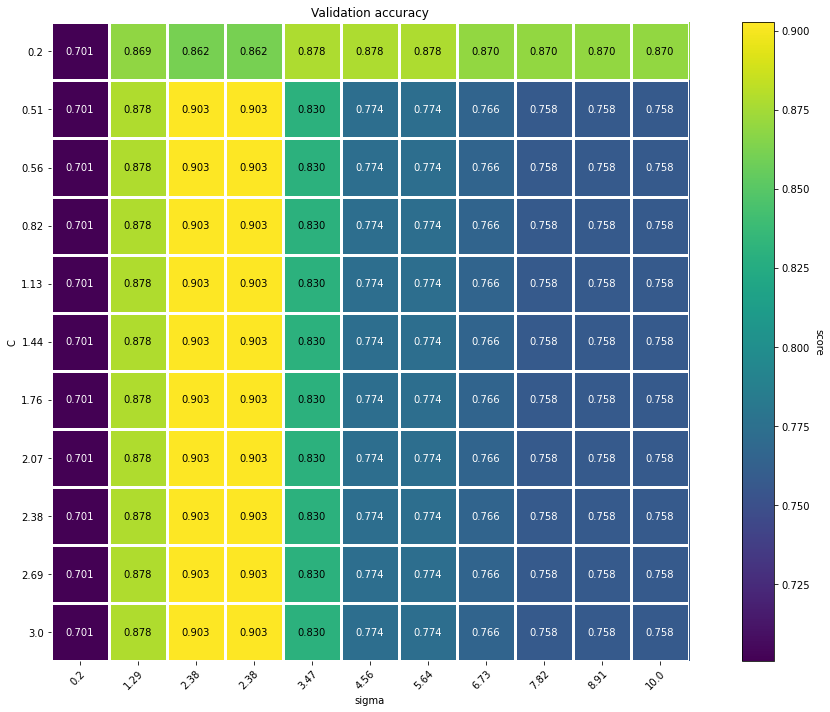

In [10]:
new_gs = score_zoom(gs_res, param_grid=param_grid, log=log)

## Class_0 non-conservative metric GridSearch

In [11]:
C_range = np.concatenate((np.logspace(-1, 0, 5), []))
sigma_range = np.concatenate((np.logspace(-1, 1, 5), []))
param_grid = {'C': C_range, 'sigma': sigma_range}

In [12]:
gs_res = grid_search(dataset_loader, estimator, 'non-conservative', param_grid, scaled=True, log=log)

***** Split n. 0
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    4.4s


mean_fit_time                       0.0849656
std_fit_time                       0.00183328
mean_score_time                    0.00497766
std_score_time                    0.000807497
param_C                                   0.1
param_sigma                                 1
params               {'C': 0.1, 'sigma': 1.0}
split0_test_score                    0.923077
split1_test_score                    0.923077
split2_test_score                    0.923077
split3_test_score                    0.923077
split4_test_score                    0.833333
split5_test_score                    0.833333
split6_test_score                           1
split7_test_score                    0.916667
split8_test_score                    0.916667
split9_test_score                    0.916667
mean_test_score                      0.910897
std_test_score                      0.0454586
rank_test_score                             1
Name: 2, dtype: object
score on test:  0.7777777777777778


[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed:   12.5s finished


100%|##########| 22500/22500 [00:09<00:00, 2432.55it/s]


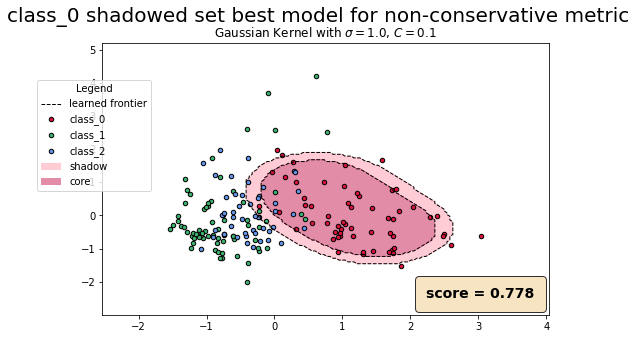

In [13]:
plot_shadowed_set(gs_res, labels, label_colors, contourf_colors, simplified=True)

## Class_0 non-conservative metric score charts

In [14]:
C_range = np.linspace(0.1, 10, 10)
sigma_range = np.linspace(0.2, 5, 10)
param_grid = {'C': C_range, 'sigma': sigma_range}

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 121 candidates, totalling 1210 fits


[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    4.1s
[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:   18.3s
[Parallel(n_jobs=2)]: Done 888 tasks      | elapsed:   42.2s
[Parallel(n_jobs=2)]: Done 1210 out of 1210 | elapsed:   57.7s finished


mean_fit_time                       0.0818392
std_fit_time                       0.00111368
mean_score_time                    0.00468483
std_score_time                    0.000585405
param_C                                   0.1
param_sigma                                 1
params               {'C': 0.1, 'sigma': 1.0}
split0_test_score                    0.923077
split1_test_score                    0.923077
split2_test_score                    0.923077
split3_test_score                    0.923077
split4_test_score                    0.833333
split5_test_score                    0.833333
split6_test_score                           1
split7_test_score                    0.916667
split8_test_score                    0.916667
split9_test_score                    0.916667
mean_test_score                      0.910897
std_test_score                      0.0454586
rank_test_score                             1
Name: 2, dtype: object
score on test:  0.7777777777777778


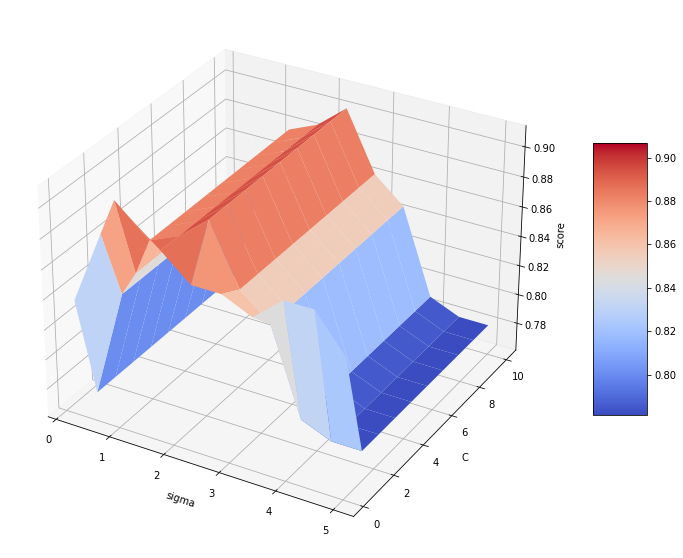

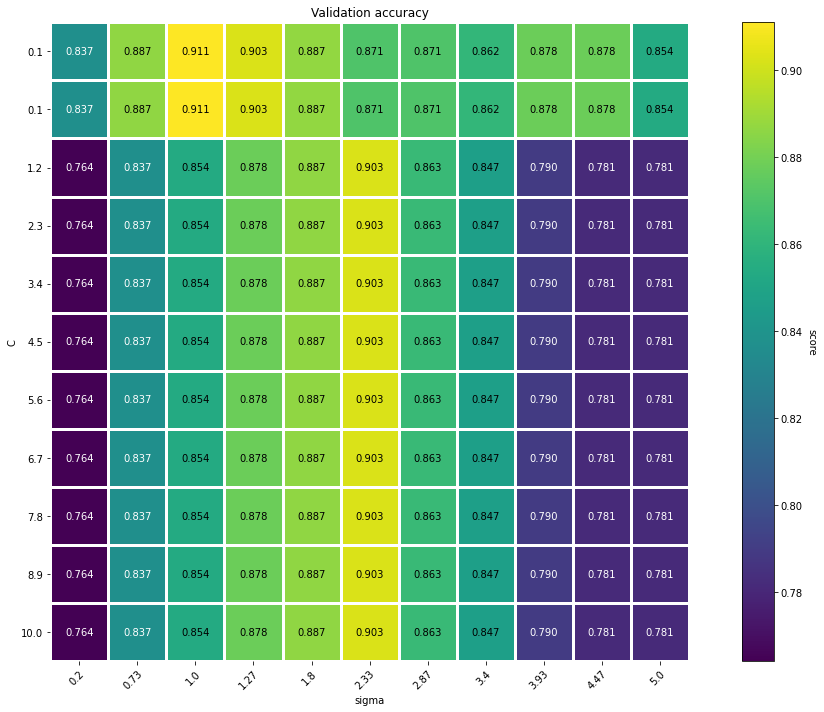

In [15]:
new_gs = score_zoom(gs_res, param_grid=param_grid, log=log)

## Class_1 conservative metric GridSearch

In [16]:
dataset_loader = lambda: load_wine_dataset(d=2, target='class_1')
contourf_colors = ['white', 'aquamarine', 'lightseagreen', 'red']

In [17]:
C_range = np.concatenate((np.logspace(-1, 0, 5), [0.1]))
sigma_range = np.concatenate((np.logspace(-1, 1, 5), [0.644444]))
param_grid = {'C': C_range, 'sigma': sigma_range}

In [18]:
gs_res = grid_search(dataset_loader, estimator, 'conservative', param_grid, scaled=True, log=log)

***** Split n. 0
Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    5.4s


mean_fit_time                              0.10905
std_fit_time                            0.00139281
mean_score_time                          0.0055105
std_score_time                         0.000543793
param_C                                        0.1
param_sigma                               0.644444
params               {'C': 0.1, 'sigma': 0.644444}
split0_test_score                         0.846154
split1_test_score                         0.615385
split2_test_score                         0.769231
split3_test_score                         0.692308
split4_test_score                             0.75
split5_test_score                             0.75
split6_test_score                             0.75
split7_test_score                         0.666667
split8_test_score                         0.833333
split9_test_score                             0.75
mean_test_score                           0.742308
std_test_score                            0.066605
rank_test_score                

[Parallel(n_jobs=2)]: Done 360 out of 360 | elapsed:   21.9s finished


100%|##########| 22500/22500 [00:11<00:00, 2017.98it/s]


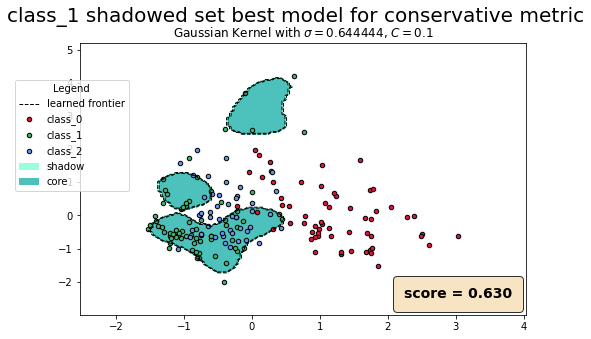

In [19]:
plot_shadowed_set(gs_res, labels, label_colors, contourf_colors, simplified=True)

## Class_1 conservative metric score charts

In [20]:
C_range = np.linspace(0.2, 5, 5)
sigma_range = np.linspace(0.1, 3, 10)
param_grid = {'C': C_range, 'sigma': sigma_range}

Fitting 10 folds for each of 66 candidates, totalling 660 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    5.3s
[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:   23.6s
[Parallel(n_jobs=2)]: Done 660 out of 660 | elapsed:   40.0s finished


mean_fit_time                             0.108469
std_fit_time                           0.000832367
mean_score_time                         0.00566187
std_score_time                         0.000590337
param_C                                        0.1
param_sigma                               0.644444
params               {'C': 0.1, 'sigma': 0.644444}
split0_test_score                         0.846154
split1_test_score                         0.615385
split2_test_score                         0.769231
split3_test_score                         0.692308
split4_test_score                             0.75
split5_test_score                             0.75
split6_test_score                             0.75
split7_test_score                         0.666667
split8_test_score                         0.833333
split9_test_score                             0.75
mean_test_score                           0.742308
std_test_score                            0.066605
rank_test_score                

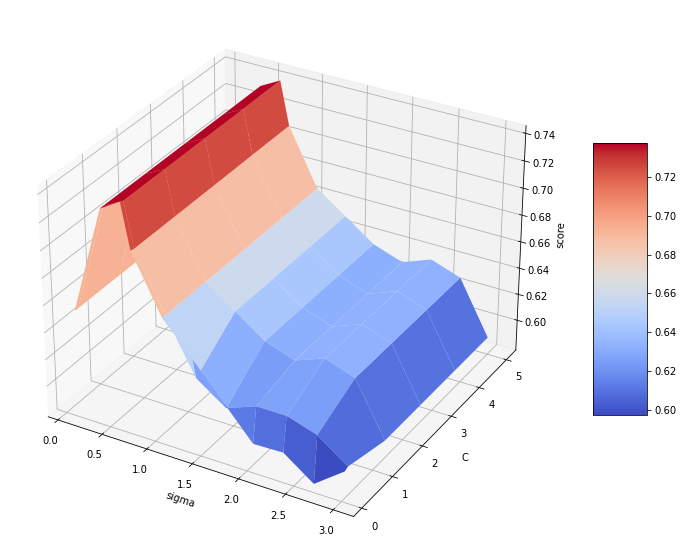

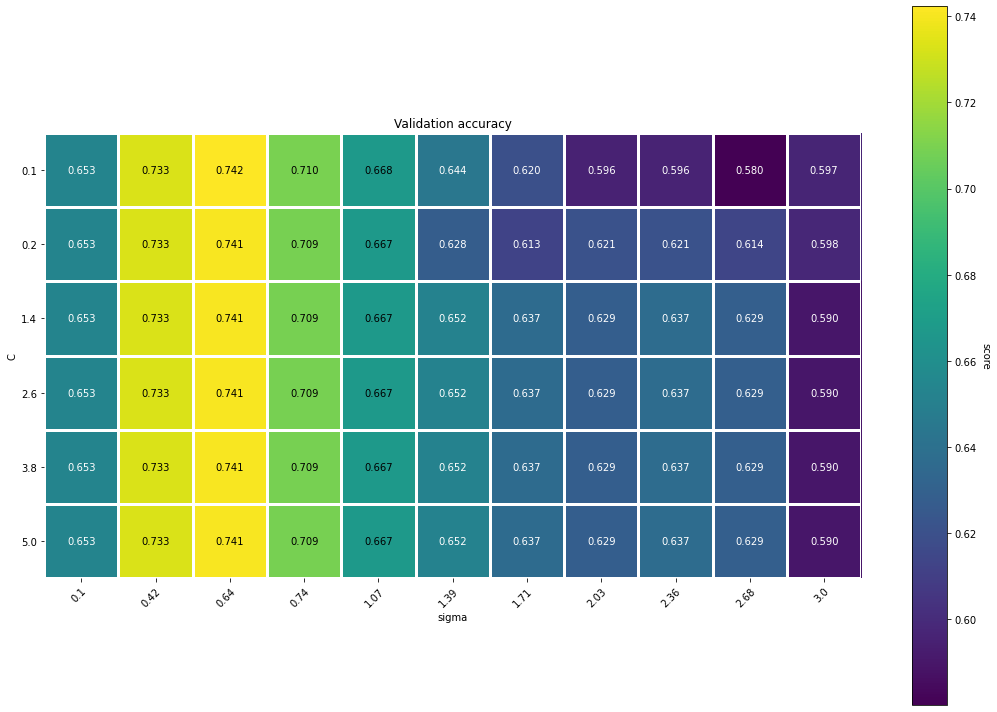

In [21]:
new_gs = score_zoom(gs_res, param_grid=param_grid, log=log)

## Class_1 non-conservative metric GridSearch

In [22]:
C_range = np.concatenate((np.logspace(-1, 0, 5), []))
sigma_range = np.concatenate((np.logspace(-1, 1, 5), []))
param_grid = {'C': C_range, 'sigma': sigma_range}

In [23]:
gs_res = grid_search(dataset_loader, estimator, 'non-conservative', param_grid, scaled=True, log=log)

***** Split n. 0
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    5.3s


mean_fit_time                         0.12037
std_fit_time                       0.00129687
mean_score_time                    0.00542309
std_score_time                    0.000456818
param_C                                   0.1
param_sigma                               0.1
params               {'C': 0.1, 'sigma': 0.1}
split0_test_score                    0.846154
split1_test_score                    0.615385
split2_test_score                    0.769231
split3_test_score                    0.846154
split4_test_score                    0.833333
split5_test_score                    0.833333
split6_test_score                    0.583333
split7_test_score                        0.75
split8_test_score                        0.75
split9_test_score                        0.75
mean_test_score                      0.757692
std_test_score                        0.08835
rank_test_score                             1
Name: 0, dtype: object
score on test:  0.7037037037037037


[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed:   15.1s finished


100%|##########| 22500/22500 [00:11<00:00, 1990.89it/s]


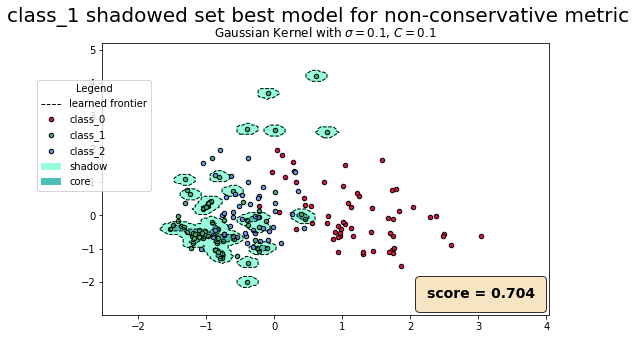

In [24]:
plot_shadowed_set(gs_res, labels, label_colors, contourf_colors, simplified=True)

## Class_1 non-conservative metric score charts

In [25]:
C_range = np.linspace(0.2, 4, 5)
sigma_range = np.linspace(0.01, 10, 10)
param_grid = {'C': C_range, 'sigma': sigma_range}

Fitting 10 folds for each of 66 candidates, totalling 660 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    5.4s
[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:   23.6s
[Parallel(n_jobs=2)]: Done 660 out of 660 | elapsed:   40.0s finished


mean_fit_time                        0.121717
std_fit_time                       0.00159366
mean_score_time                    0.00571771
std_score_time                    0.000414515
param_C                                   0.1
param_sigma                               0.1
params               {'C': 0.1, 'sigma': 0.1}
split0_test_score                    0.846154
split1_test_score                    0.615385
split2_test_score                    0.769231
split3_test_score                    0.846154
split4_test_score                    0.833333
split5_test_score                    0.833333
split6_test_score                    0.583333
split7_test_score                        0.75
split8_test_score                        0.75
split9_test_score                        0.75
mean_test_score                      0.757692
std_test_score                        0.08835
rank_test_score                             1
Name: 1, dtype: object
score on test:  0.7037037037037037


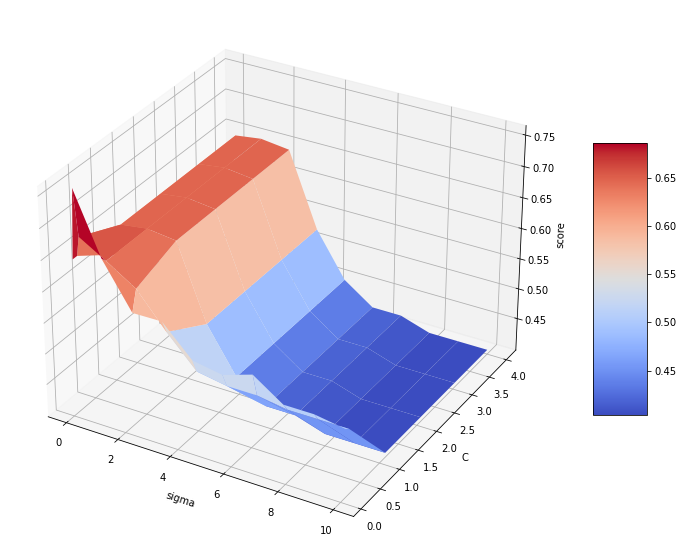

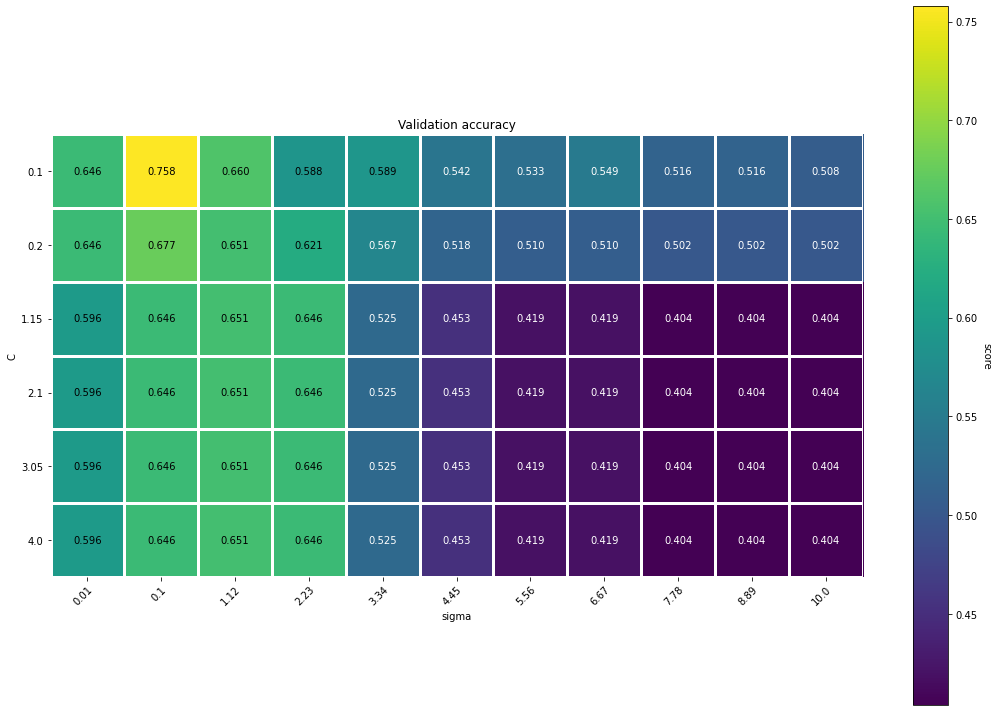

In [26]:
new_gs = score_zoom(gs_res, param_grid=param_grid, log=log)

## Class_2 conservative metric GridSearch

In [27]:
dataset_loader = lambda: load_wine_dataset(d=2, target='class_2')
contourf_colors = ['white', 'lightskyblue', 'steelblue', 'red']

In [28]:
C_range = np.concatenate((np.logspace(-1, 0, 5), [0.1]))
sigma_range = np.concatenate((np.logspace(-1, 1, 5), [0.644444]))
param_grid = {'C': C_range, 'sigma': sigma_range}

In [29]:
gs_res = grid_search(dataset_loader, estimator, 'conservative', param_grid, scaled=True, log=log)

***** Split n. 0
Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    3.2s


mean_fit_time                       0.0623355
std_fit_time                       0.00157684
mean_score_time                    0.00367582
std_score_time                    0.000522055
param_C                                   0.1
param_sigma                                 1
params               {'C': 0.1, 'sigma': 1.0}
split0_test_score                    0.692308
split1_test_score                    0.923077
split2_test_score                    0.846154
split3_test_score                    0.846154
split4_test_score                        0.75
split5_test_score                           1
split6_test_score                        0.75
split7_test_score                    0.833333
split8_test_score                        0.75
split9_test_score                    0.916667
mean_test_score                      0.830769
std_test_score                      0.0915209
rank_test_score                             1
Name: 2, dtype: object
score on test:  0.7592592592592593


[Parallel(n_jobs=2)]: Done 360 out of 360 | elapsed:   13.2s finished


100%|##########| 22500/22500 [00:07<00:00, 3060.72it/s]


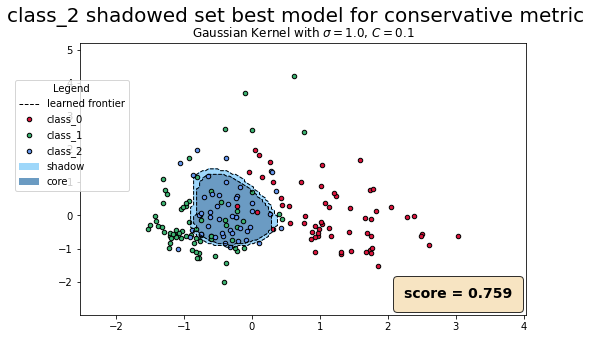

In [30]:
plot_shadowed_set(gs_res, labels, label_colors, contourf_colors, simplified=True)

## Class_2 conservative metric score charts

In [31]:
C_range = np.linspace(0.2, 5, 5)
sigma_range = np.linspace(0.1, 3, 10)
param_grid = {'C': C_range, 'sigma': sigma_range}

Fitting 10 folds for each of 66 candidates, totalling 660 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    3.1s
[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:   14.1s
[Parallel(n_jobs=2)]: Done 660 out of 660 | elapsed:   24.0s finished


mean_fit_time                       0.0638278
std_fit_time                       0.00201339
mean_score_time                    0.00380838
std_score_time                    0.000293549
param_C                                   0.1
param_sigma                                 1
params               {'C': 0.1, 'sigma': 1.0}
split0_test_score                    0.692308
split1_test_score                    0.923077
split2_test_score                    0.846154
split3_test_score                    0.846154
split4_test_score                        0.75
split5_test_score                           1
split6_test_score                        0.75
split7_test_score                    0.833333
split8_test_score                        0.75
split9_test_score                    0.916667
mean_test_score                      0.830769
std_test_score                      0.0915209
rank_test_score                             1
Name: 3, dtype: object
score on test:  0.7592592592592593


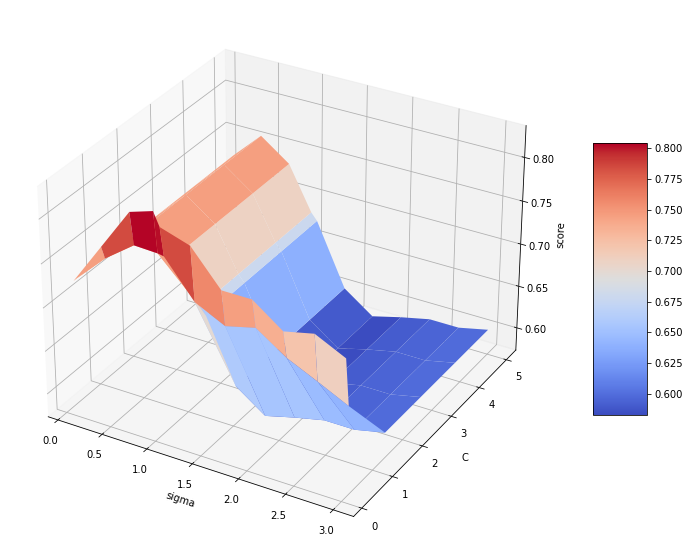

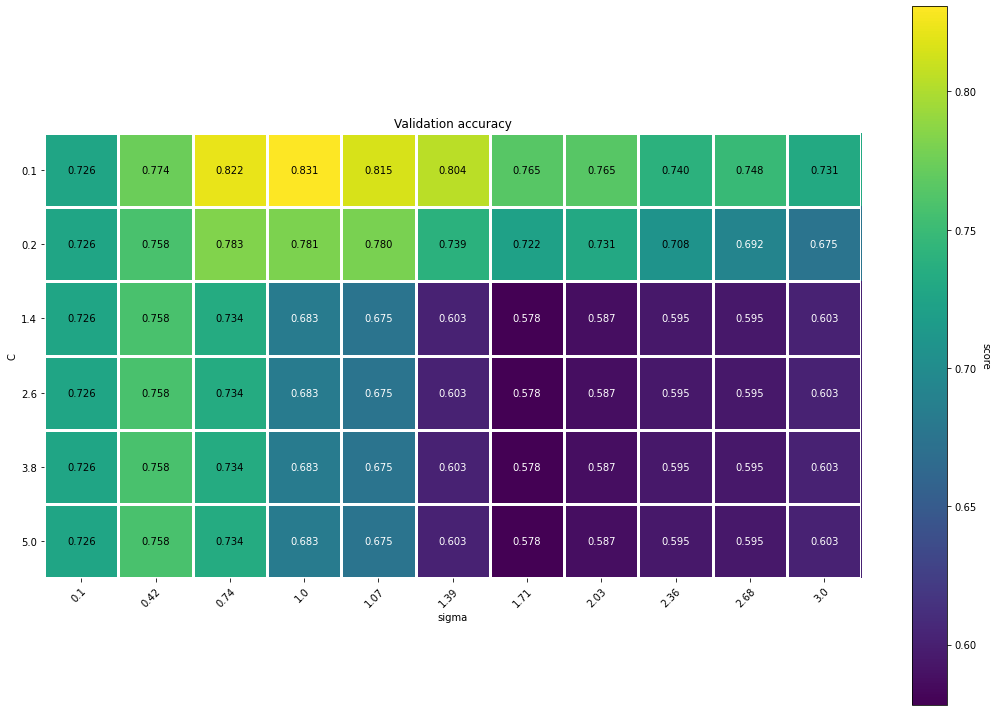

In [32]:
new_gs = score_zoom(gs_res, param_grid=param_grid, log=log)

## Class_2 non-conservative metric GridSearch

In [33]:
C_range = np.concatenate((np.logspace(-1, 0, 5), []))
sigma_range = np.concatenate((np.logspace(-1, 1, 5), [1.12]))
param_grid = {'C': C_range, 'sigma': sigma_range}

In [34]:
gs_res = grid_search(dataset_loader, estimator, 'non-conservative', param_grid, scaled=True, log=log)

***** Split n. 0
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    3.2s


mean_fit_time                        0.0629552
std_fit_time                        0.00202784
mean_score_time                     0.00380661
std_score_time                     0.000525616
param_C                                    0.1
param_sigma                               1.12
params               {'C': 0.1, 'sigma': 1.12}
split0_test_score                     0.692308
split1_test_score                     0.923077
split2_test_score                     0.923077
split3_test_score                     0.923077
split4_test_score                     0.666667
split5_test_score                            1
split6_test_score                     0.666667
split7_test_score                     0.833333
split8_test_score                         0.75
split9_test_score                     0.916667
mean_test_score                       0.829487
std_test_score                        0.118796
rank_test_score                              1
Name: 5, dtype: object
score on test:  0.7407407407407407


[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:   11.1s finished


100%|##########| 22500/22500 [00:07<00:00, 2972.98it/s]


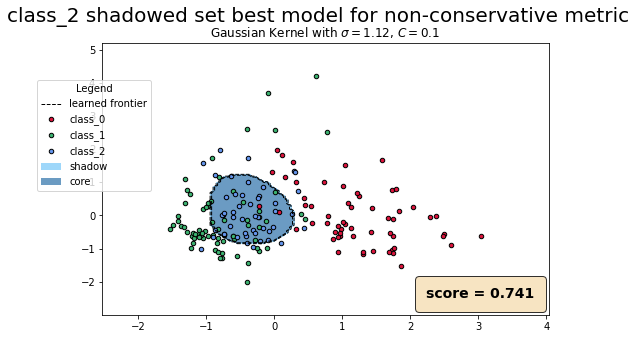

In [35]:
plot_shadowed_set(gs_res, labels, label_colors, contourf_colors, simplified=True)

## Class_2 non-conservative metric score charts

In [36]:
C_range = np.linspace(0.2, 4, 5)
sigma_range = np.linspace(0.01, 10, 10)
param_grid = {'C': C_range, 'sigma': sigma_range}

Fitting 10 folds for each of 66 candidates, totalling 660 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    3.1s
[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:   14.2s
[Parallel(n_jobs=2)]: Done 660 out of 660 | elapsed:   24.2s finished


mean_fit_time                        0.0630183
std_fit_time                        0.00197326
mean_score_time                     0.00370858
std_score_time                     0.000585509
param_C                                    0.1
param_sigma                               1.12
params               {'C': 0.1, 'sigma': 1.12}
split0_test_score                     0.692308
split1_test_score                     0.923077
split2_test_score                     0.923077
split3_test_score                     0.923077
split4_test_score                     0.666667
split5_test_score                            1
split6_test_score                     0.666667
split7_test_score                     0.833333
split8_test_score                         0.75
split9_test_score                     0.916667
mean_test_score                       0.829487
std_test_score                        0.118796
rank_test_score                              1
Name: 1, dtype: object
score on test:  0.7407407407407407


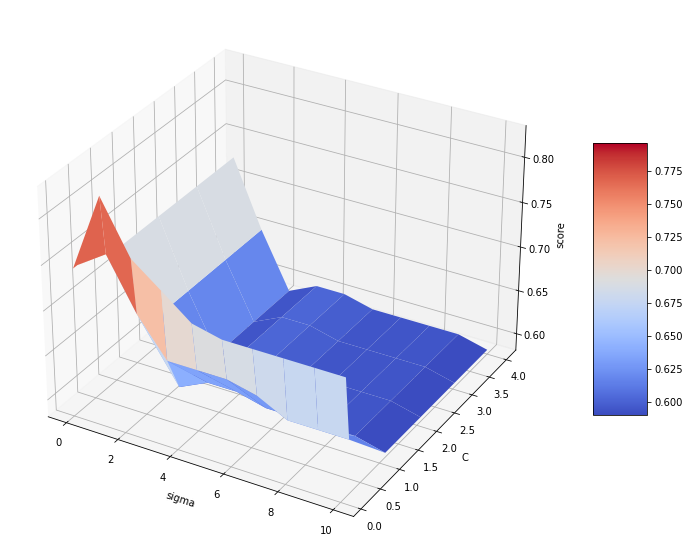

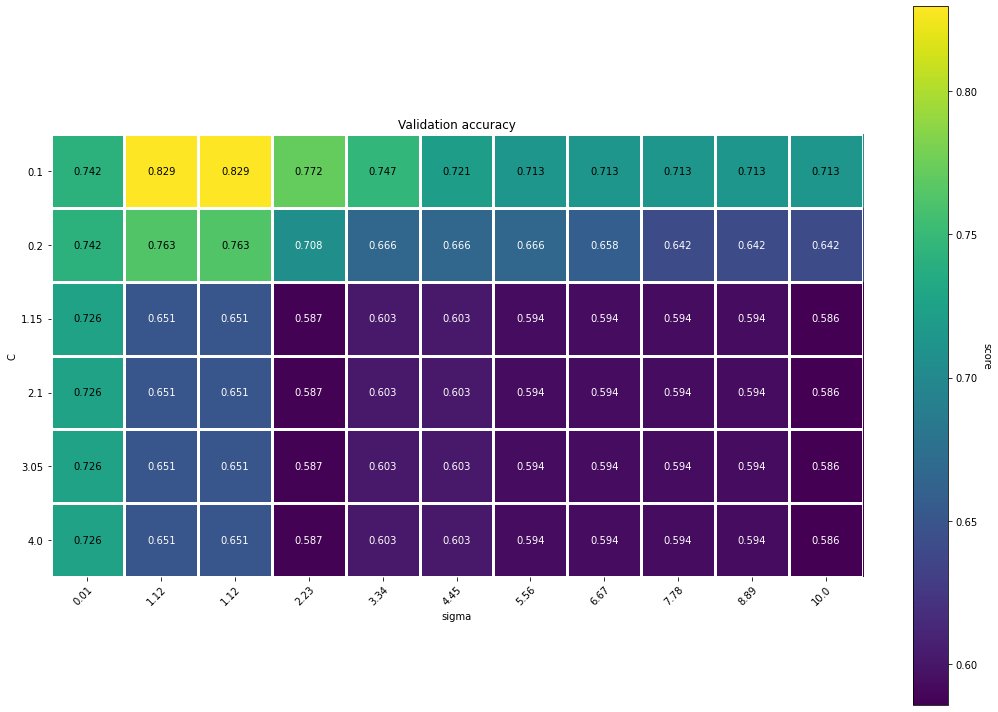

In [37]:
new_gs = score_zoom(gs_res, param_grid=param_grid, log=log)

In [38]:
log_last_execution('Finished Grid Search for Gurobi Two Phases Single C Models on wine dataset', log)

Last complete execution: 2020-11-11 11:46:01
